# C++ Branch and Bound with Python DefaultUserCallbacks

This implementation shall allow us to quickly implement new ideas an check the performance.
The branch and bound is implemented in reasonably fast C++, while PyBind11 allows us to not only call it but also to add lower and upper bounds via a callback that is called at every node.

In [1]:
# import the stuff
from cetsp.core import Circle, Instance, compute_tour_by_2opt, branch_and_bound, Point, plot_solution

In [13]:
# create a simple instance

import random
circles = [Circle(Point(x*(1+random.random()), y*(1+random.random())), 1) for x in range(7) for y in range(7)]
instance = Instance(circles[:20], Point(0,0), Point(10,10))
instance_ = Instance(circles, Point(0,0), Point(10,10))

## Initial Solution

Branch and Bound can benefit from a good upper bound. However, it is also pretty quick in finding good solutions so probably it is more promising to go for lower bounds.

In [14]:
# compute an initial solution via 2opt
initial_solution = compute_tour_by_2opt(instance_)

In [15]:
def cb(context):
    if context.current_node.is_feasible():
        traj = context.current_node.get_relaxed_solution()
        for c in circles:
            if not traj.distance(c) <= 0.01:
                print("lazy add c")
                context.add_lazy_circle(c)
        ub = context.get_upper_bound()
        print(f"Found a new solution! The currently best solution has a value of {ub}.")
        
timelimit = 60
opt_solution = branch_and_bound(instance, cb, initial_solution, timelimit)

i	LB	|	UB
0	18.7506	|	37.8001
1	19.1667	|	37.8001
2	19.2063	|	37.8001
3	19.2063	|	37.8001
4	19.2063	|	37.8001
5	19.2063	|	37.8001
6	19.2063	|	37.8001
lazy add c
lazy add c
lazy add c
lazy add c
lazy add c
lazy add c
lazy add c
lazy add c
lazy add c
lazy add c
lazy add c
lazy add c
lazy add c
lazy add c
lazy add c
lazy add c
lazy add c
lazy add c
lazy add c
lazy add c
lazy add c
lazy add c
lazy add c
lazy add c
lazy add c
lazy add c
Found a new solution! The currently best solution has a value of 37.8001151595141.
7	19.2063	|	37.8001
8	19.2063	|	37.8001
9	19.2063	|	37.8001
10	19.2063	|	37.8001
20	19.2063	|	37.8001
30	19.2063	|	37.8001
40	19.2063	|	37.8001
50	19.2063	|	37.8001
60	19.2063	|	37.8001
70	19.2063	|	37.8001
80	19.2063	|	37.8001
90	19.2063	|	37.8001
100	19.2063	|	37.8001
200	19.2063	|	37.8001
300	19.2063	|	37.8001
400	19.2063	|	37.8001
500	19.2063	|	37.8001
600	19.2063	|	37.8001
700	19.2063	|	37.8001
800	19.2063	|	37.8001
900	19.2063	|	37.8001
1000	19.2063	|	37.8001
1100	19.206

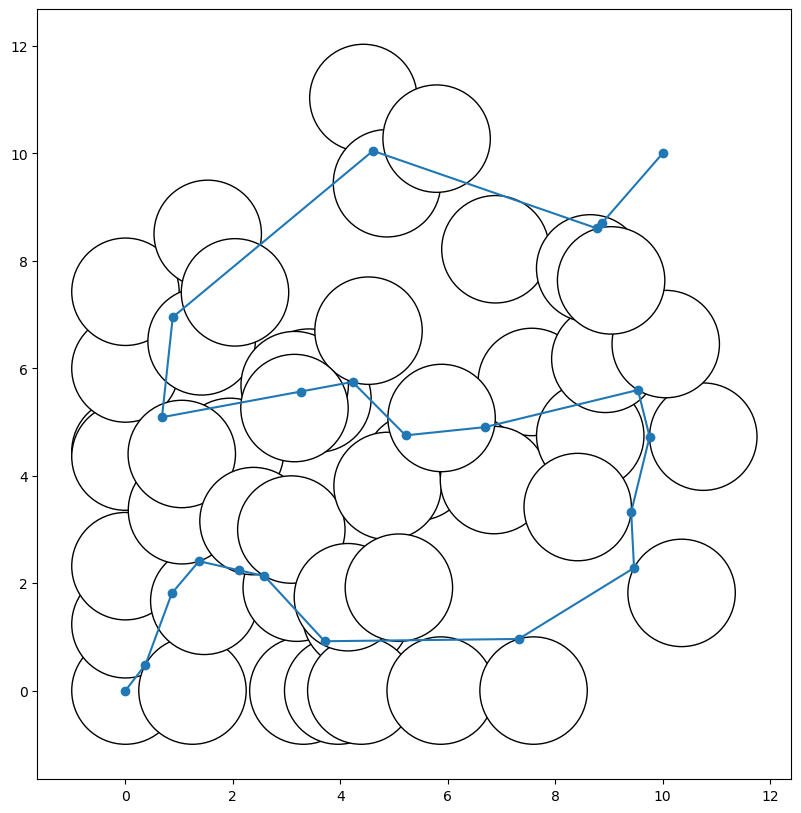

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
plot_solution(plt.gca(), instance_, opt_solution)

## Getting data and manipulating the nodes via callback.

The user_callbacks allow us to access a lot of data and we can use it to influence the BnB in most ways.

The following example does some useless things just to show off. Note how the lower bound gets higher because of this (the lower bound is bad because of the manipulation).

In [6]:
def cb(context):
    order = context.current_node.get_fixed_sequence()
    if len(order)>3 and order[1]<order[2]:  # useless abort if order[1] has a lower index than order[2]
        context.current_node.prune()
        return
    
    if context.current_node.is_feasible():
        ub = context.get_upper_bound()
        obj = context.current_node.get_relaxed_solution().length()
        print(f"Found a new solution of value {obj}! The currently best solution has a value of {ub}.")
        order = context.current_node.get_fixed_sequence()
        print(f"Its sequence is {order}")
    else:
        context.current_node.add_lower_bound(context.current_node.get_lower_bound()*1.05)  # increasing the lb by the relaxation by 5% (also a stupid idea)
        
        
timelimit = 60
opt_solution = branch_and_bound(instance_, cb , initial_solution, timelimit)

i	LB	|	UB
0	19.6908	|	26.818
1	20.6753	|	26.818
2	21.1725	|	26.818
3	21.3048	|	26.818
4	21.3048	|	26.818
5	21.3048	|	26.818
6	21.3048	|	26.818
7	22.1385	|	26.818
8	22.1385	|	26.818
9	22.1385	|	26.818
10	22.1385	|	26.818
Found a new solution of value 22.830739269005498! The currently best solution has a value of 26.81795987961235.
Its sequence is [2, 18, 6, 14, 15, 4, 5, 17]
20	22.1385	|	22.8307
30	22.1385	|	22.8307
40	22.1385	|	22.8307
50	22.1385	|	22.8307
60	22.1385	|	22.8307
---------------
66	23.9697	|	22.8307


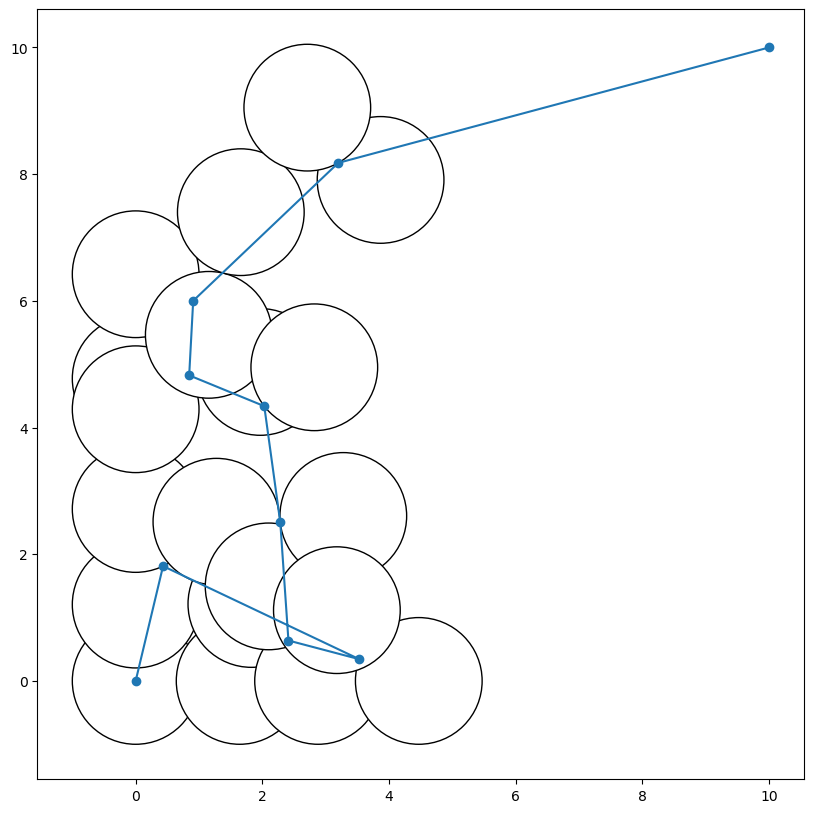

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
plot_solution(plt.gca(), instance_, opt_solution)